In [1]:
!pip install ultralytics
!pip install roboflow

In [2]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EixuzxbybAFPCmGCDgja")
project = rf.workspace("annotate-9u88r").project("underwater-fqnwh")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.29, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Underwater-1 in yolov8:: 100%|██████████| 3929/3929 [00:01<00:00, 3730.47it/s]


In [8]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Underwater-1/data.yaml epochs=30 imgsz=640 plots=True

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Underwater-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [10]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data=/content/Underwater-1/data.yaml

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Underwater-1/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:05<00:00,  1.17s/it]
                   all         70        264      0.903       0.91      0.944      0.738
                  Fish         70        251      0.844       0.82      0.894      0.533
                 Shark         70         13      0.961          1      0.995      0.943
Speed: 3.6ms preprocess, 15.1ms inference, 0.0ms loss, 12.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


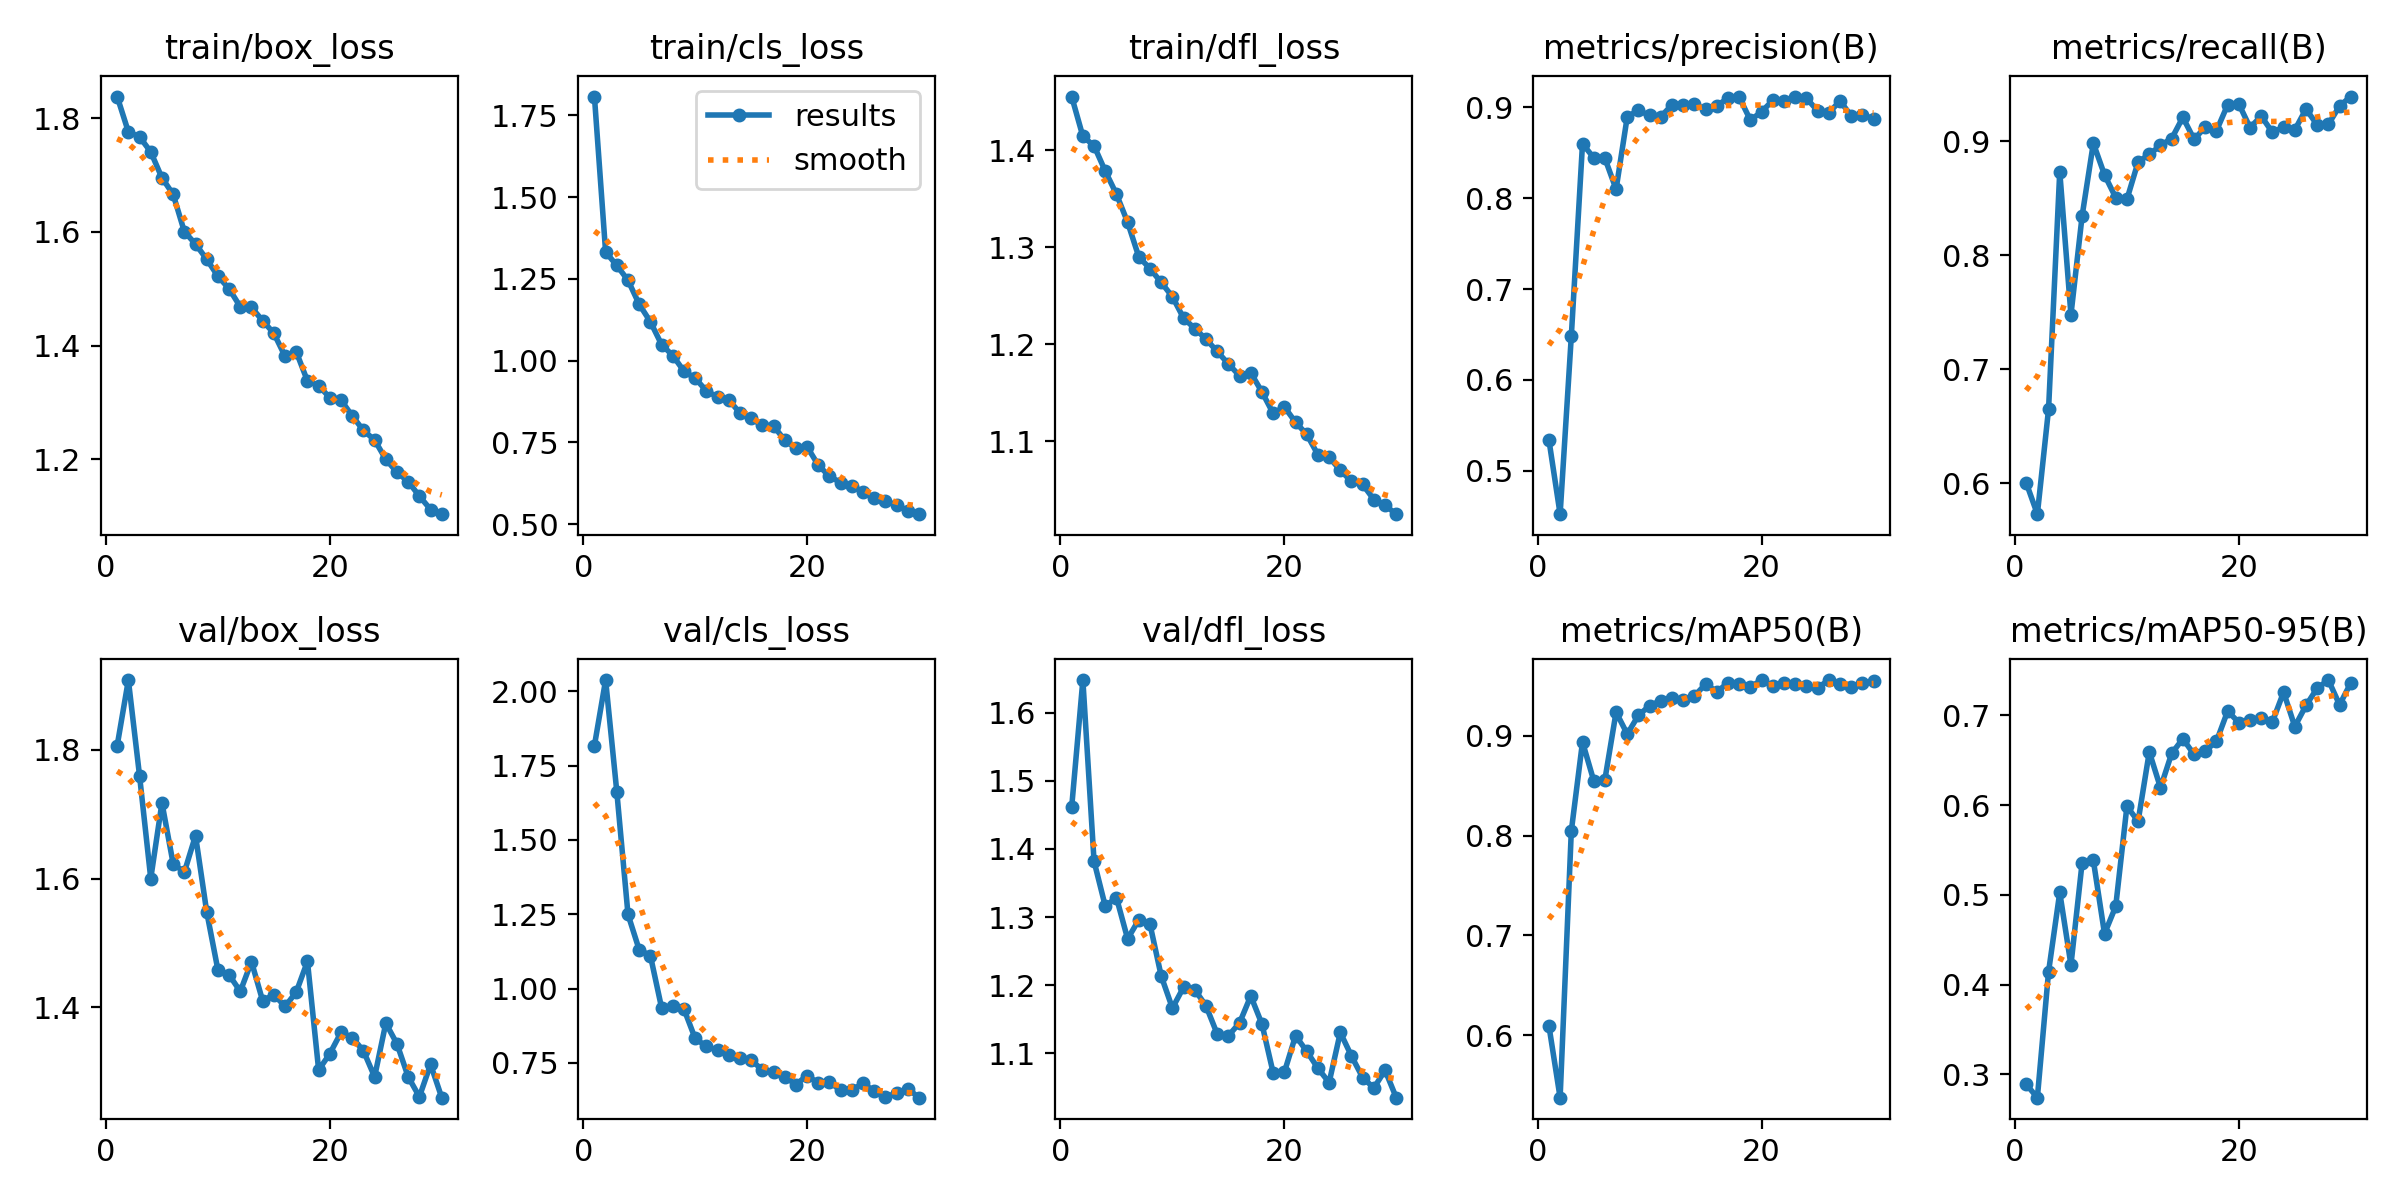

In [12]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/detect/train5/results.png', width=600)

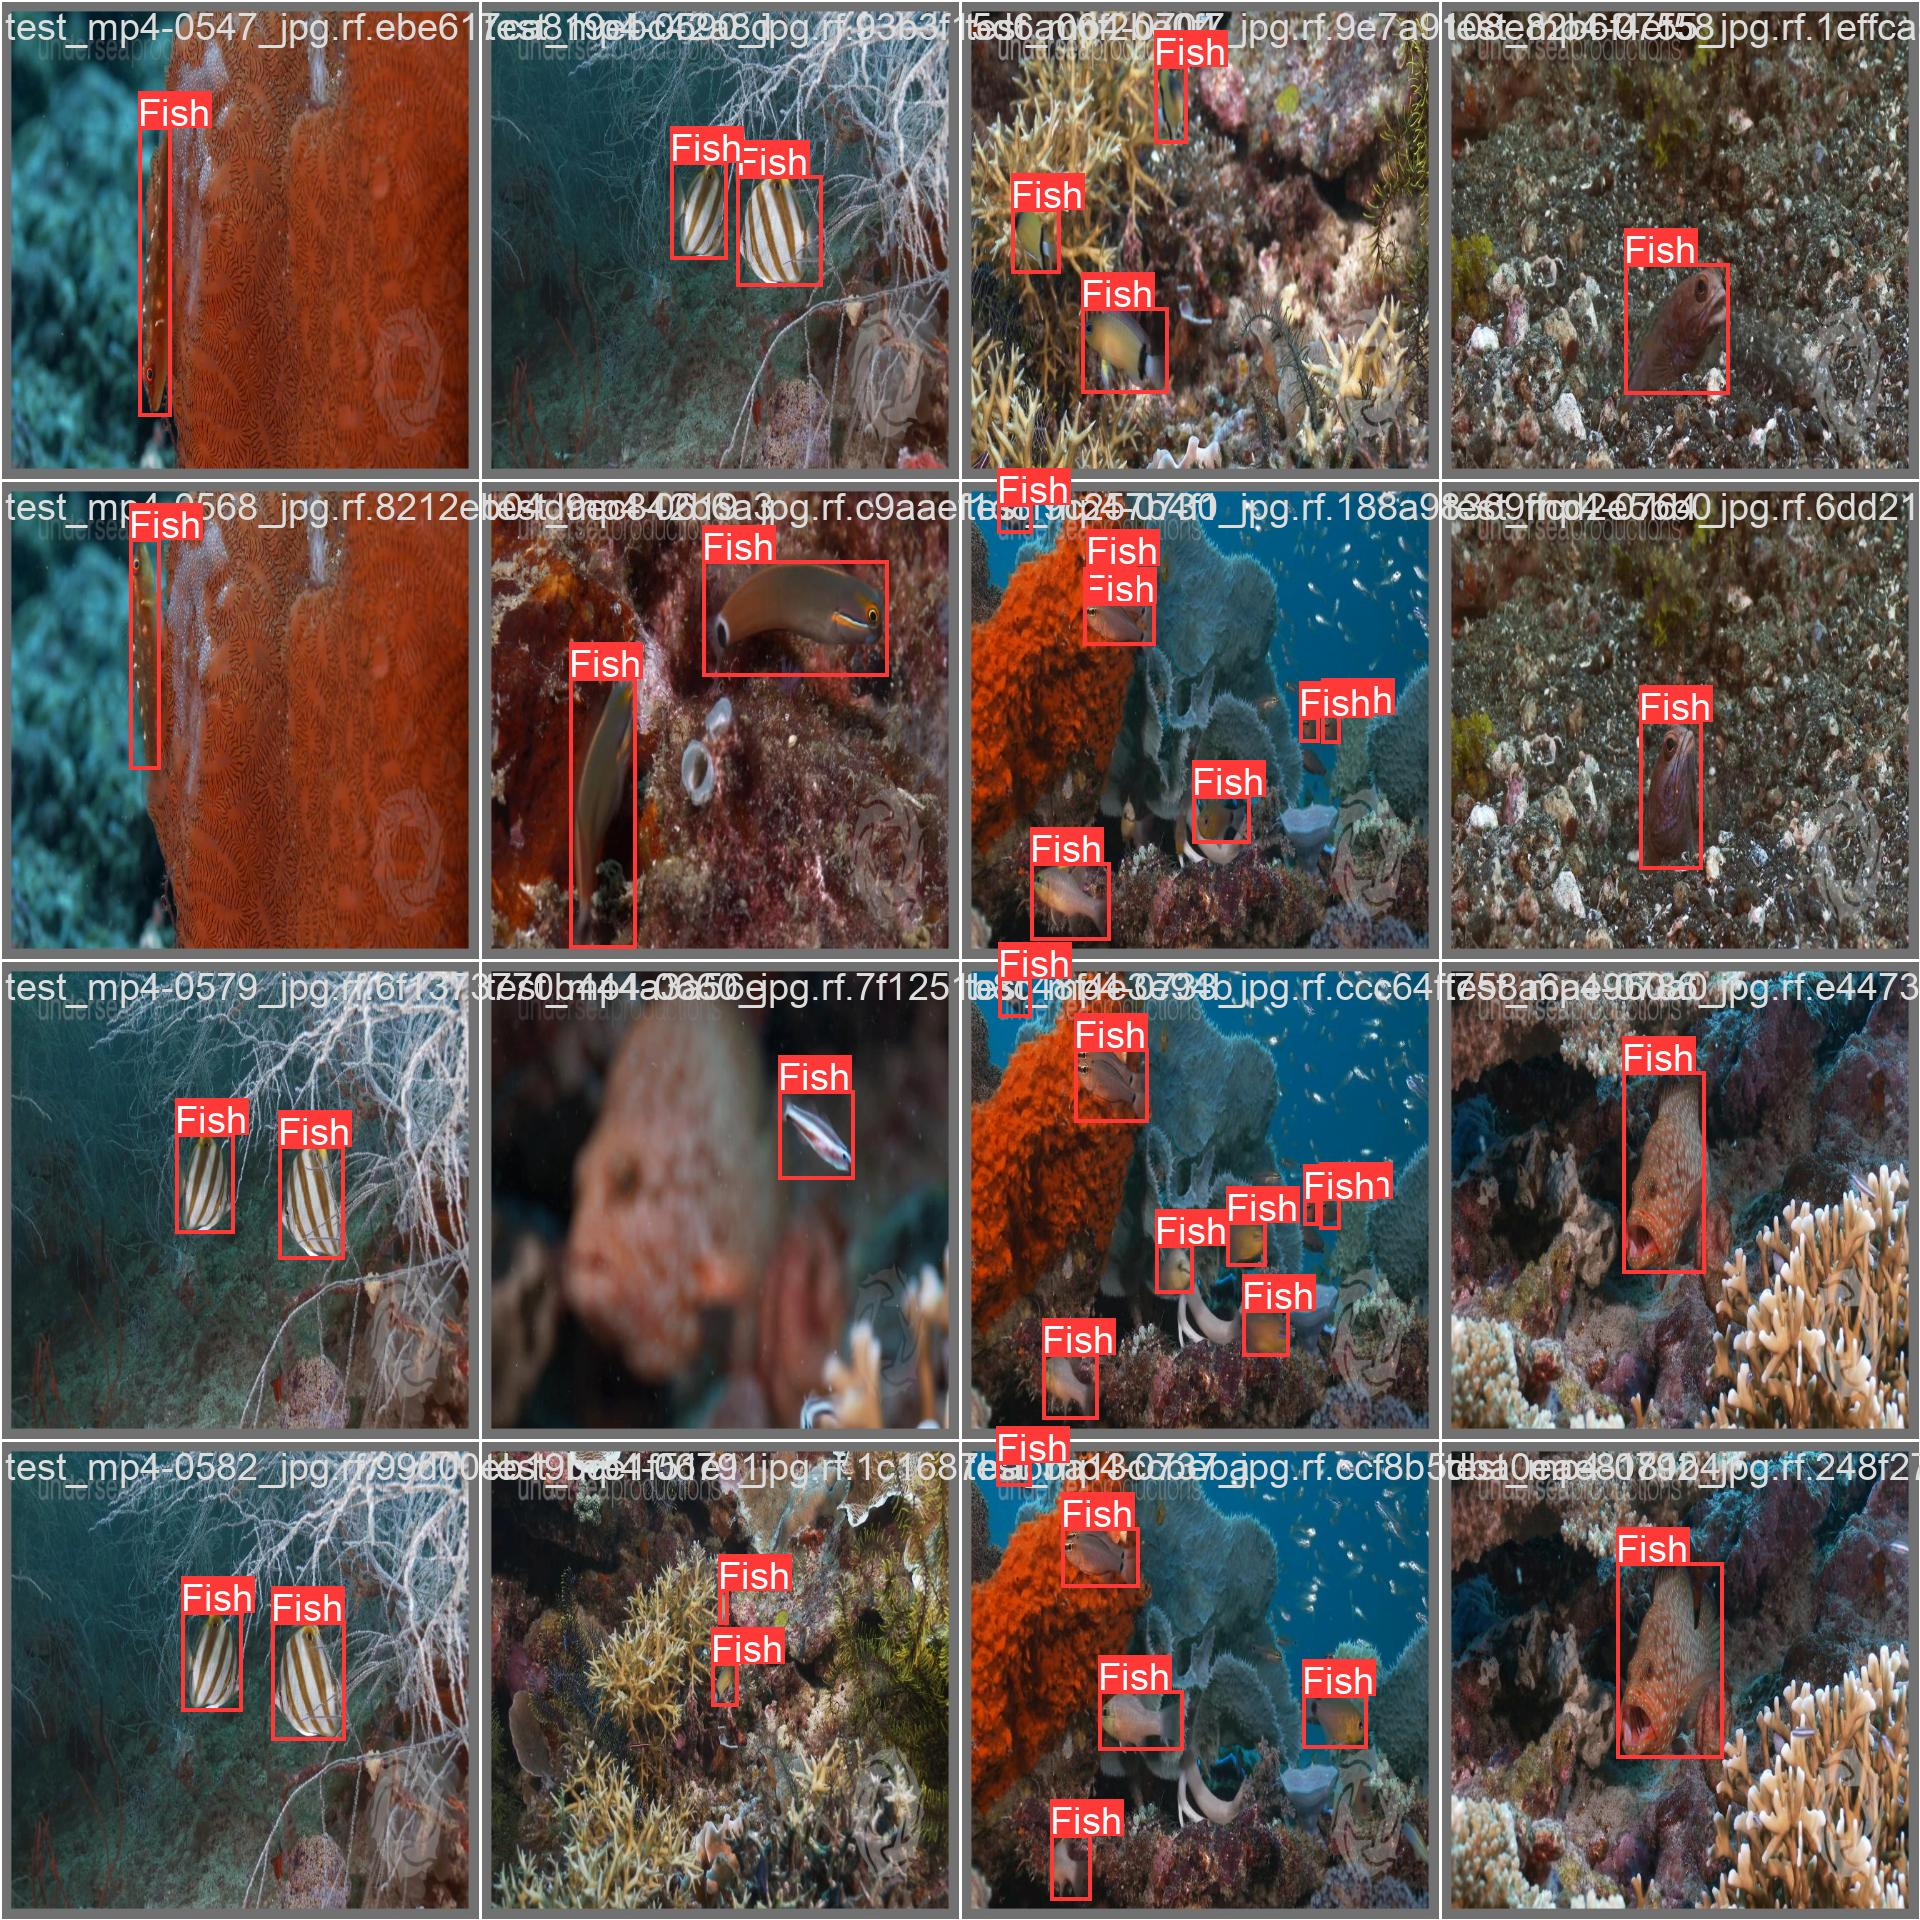

In [14]:
Image(filename=f'/content/runs/detect/train5/val_batch1_labels.jpg')